In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/AI_Resume_Screening.csv')

DATA EXPLORATION

In [ ]:
data.copy().head()

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [ ]:
data.shape

(1000, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
data['Job Role'].value_counts()

,count
Job Role,
AI Researcher,257
Data Scientist,255
Cybersecurity Analyst,255
Software Engineer,233


DATA PREPROCESSING

In [ ]:
data.drop(['Resume_ID', 'Name', 'Recruiter Decision', 'Salary Expectation ($)', 'AI Score (0-100)'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Skills              1000 non-null   object
 1   Experience (Years)  1000 non-null   int64 
 2   Education           1000 non-null   object
 3   Certifications      726 non-null    object
 4   Job Role            1000 non-null   object
 5   Projects Count      1000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [ ]:
data.isnull().sum()

,0
Skills,0
Experience (Years),0
Education,0
Certifications,274
Job Role,0
Projects Count,0


In [ ]:
data['Certifications'] = data['Certifications'].fillna(value='None')
data['Certifications'].isnull().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
Skills,0
Experience (Years),0
Education,0
Certifications,0
Job Role,0
Projects Count,0


In [ ]:
data['Certifications'].unique()

array(['None', 'Google ML', 'Deep Learning Specialization',
       'AWS Certified'], dtype=object)

In [ ]:
duplicate_rows = data[data.duplicated()]
print("Duplicated Rows:")
print(duplicate_rows)

data_no_duplicates = data.drop_duplicates()
print("\nDataframe after removing duplicates:")

Duplicated Rows:
Empty DataFrame
Columns: [Skills, Experience (Years), Education, Certifications, Job Role, Projects Count]
Index: []

Dataframe after removing duplicates:


In [ ]:
data['Skills'].unique()

array(['TensorFlow, NLP, Pytorch',
       'Deep Learning, Machine Learning, Python, SQL',
       'Ethical Hacking, Cybersecurity, Linux',
       'Python, Pytorch, TensorFlow', 'SQL, React, Java',
       'Cybersecurity, Networking, Linux, Ethical Hacking',
       'Networking, Cybersecurity, Ethical Hacking',
       'TensorFlow, Pytorch, NLP', 'Networking, Ethical Hacking',
       'Python, TensorFlow, Pytorch, NLP', 'SQL, Java, C++',
       'Cybersecurity, Ethical Hacking, Networking',
       'Cybersecurity, Networking', 'SQL, C++, Java', 'Pytorch, NLP',
       'SQL, Python', 'Linux, Networking, Cybersecurity, Ethical Hacking',
       'SQL, Python, Deep Learning', 'Machine Learning, SQL, Python',
       'SQL, Java, C++, React', 'Machine Learning, Deep Learning, SQL',
       'TensorFlow, Pytorch, NLP, Python',
       'Pytorch, TensorFlow, NLP, Python', 'Python, NLP',
       'Ethical Hacking, Cybersecurity', 'NLP, Pytorch, Python',
       'Python, SQL', 'Ethical Hacking, Networking, Linux'

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
data['Skills_List'] = data['Skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])

mlb = MultiLabelBinarizer()
skills_binary = mlb.fit_transform(data['Skills_List'])

skills_labeled = pd.DataFrame(skills_binary,
                              columns=mlb.classes_,
                              index=data.index)

data = pd.concat([data, skills_labeled], axis=1)

data.drop(['Skills', 'Skills_List'], axis=1, inplace=True)

data.head()

,Experience (Years),Education,Certifications,Job Role,Projects Count,C++,Cybersecurity,Deep Learning,Ethical Hacking,Java,Linux,Machine Learning,NLP,Networking,Python,Pytorch,React,SQL,TensorFlow
0,10,B.Sc,None,AI Researcher,8,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,10,MBA,Google ML,Data Scientist,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
2,1,MBA,Deep Learning Specialization,Cybersecurity Analyst,7,0,1,0,1,0,1,0,0,0,0,0,0,0,0
3,7,B.Tech,AWS Certified,AI Researcher,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
4,4,PhD,None,Software Engineer,9,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [ ]:
data = pd.get_dummies(data, columns=['Certifications'], dtype=int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Experience (Years)                           1000 non-null   int64 
 1   Education                                    1000 non-null   object
 2   Job Role                                     1000 non-null   object
 3   Projects Count                               1000 non-null   int64 
 4   C++                                          1000 non-null   int64 
 5   Cybersecurity                                1000 non-null   int64 
 6   Deep Learning                                1000 non-null   int64 
 7   Ethical Hacking                              1000 non-null   int64 
 8   Java                                         1000 non-null   int64 
 9   Linux                                        1000 non-null   int64 
 10  Machine Learn

In [ ]:
data = pd.get_dummies(data, columns=['Education'], dtype=int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Experience (Years)                           1000 non-null   int64 
 1   Job Role                                     1000 non-null   object
 2   Projects Count                               1000 non-null   int64 
 3   C++                                          1000 non-null   int64 
 4   Cybersecurity                                1000 non-null   int64 
 5   Deep Learning                                1000 non-null   int64 
 6   Ethical Hacking                              1000 non-null   int64 
 7   Java                                         1000 non-null   int64 
 8   Linux                                        1000 non-null   int64 
 9   Machine Learning                             1000 non-null   int64 
 10  NLP          

In [ ]:
data.head()

,Experience (Years),Job Role,Projects Count,C++,Cybersecurity,Deep Learning,Ethical Hacking,Java,Linux,Machine Learning,...,TensorFlow,Certifications_AWS Certified,Certifications_Deep Learning Specialization,Certifications_Google ML,Certifications_None,Education_B.Sc,Education_B.Tech,Education_M.Tech,Education_MBA,Education_PhD
0,10,AI Researcher,8,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1,10,Data Scientist,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,Cybersecurity Analyst,7,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,7,AI Researcher,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4,4,Software Engineer,9,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

features = ["Experience (Years)", "Projects Count",  "C++", "Cybersecurity", "Deep Learning", "Ethical Hacking", "Java", "Linux",
            "Machine Learning", "NLP", "Networking", "Python", "Pytorch", "React", "SQL", "TensorFlow",
            "Certifications_AWS Certified", "Certifications_Deep Learning Specialization", "Certifications_Google ML",
            "Education_B.Sc", "Education_B.Tech", "Education_M.Tech", "Education_MBA", "Education_PhD"]

X = data[features]
y = data["Job Role"]

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = np.array(features)[selector.get_support()]
print("Selected features:", selected_features)


Selected features: ['Ethical Hacking' 'Java' 'Machine Learning' 'NLP' 'TensorFlow']


In [ ]:
features = ["Experience (Years)", "Projects Count", "Ethical Hacking", "Java", "Machine Learning", "NLP", "TensorFlow",
            "Education_B.Sc", "Education_B.Tech", "Education_M.Tech", "Education_MBA", "Education_PhD"]
X = data[features]
y = data["Job Role"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
preprocessor = ColumnTransformer([
   ("num", StandardScaler(), ["Experience (Years)", "Projects Count"]),
   ("cat", "passthrough", [ "Ethical Hacking", "Java", "Machine Learning", "NLP", "TensorFlow",
            "Education_B.Sc", "Education_B.Tech", "Education_M.Tech", "Education_MBA", "Education_PhD"])
])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [ ]:
print("\nTraining Random Forest")
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("")
print(classification_report(y_test, y_pred))


Training Random Forest
Random Forest Accuracy: 0.9
Precision: 0.9146875
Recall: 0.9
F1-score: 0.9026619565055374

                       precision    recall  f1-score   support

        AI Researcher       1.00      0.94      0.97        51
Cybersecurity Analyst       1.00      0.86      0.93        51
       Data Scientist       0.90      0.84      0.87        51
    Software Engineer       0.75      0.96      0.84        47

             accuracy                           0.90       200
            macro avg       0.91      0.90      0.90       200
         weighted avg       0.91      0.90      0.90       200



In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.9


In [ ]:
print("\nTraining K-Nearest Neighbors")


knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("")
print(classification_report(y_test, y_pred))


Training K-Nearest Neighbors
KNN Accuracy: 0.925
Precision: 0.925927993839045
Recall: 0.925
F1-score: 0.9252807692307692

                       precision    recall  f1-score   support

        AI Researcher       0.98      0.94      0.96        51
Cybersecurity Analyst       0.89      0.92      0.90        51
       Data Scientist       0.88      0.88      0.88        51
    Software Engineer       0.96      0.96      0.96        47

             accuracy                           0.93       200
            macro avg       0.93      0.93      0.93       200
         weighted avg       0.93      0.93      0.93       200



In [ ]:
KNN_accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neightbors Accuracy: {KNN_accuracy}")

K-Nearest Neightbors Accuracy: 0.925


In [ ]:
print("\nTraining Artificial Neural Network")

ann_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam'
    , max_iter=500, random_state=42))
])

ann_pipeline.fit(X_train, y_train)
y_pred = ann_pipeline.predict(X_test)

print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("")
print(classification_report(y_test, y_pred))


Training Artificial Neural Network
ANN Accuracy: 0.915
Precision: 0.9184731564243522
Recall: 0.915
F1-score: 0.9154836734693879

                       precision    recall  f1-score   support

        AI Researcher       0.98      0.94      0.96        51
Cybersecurity Analyst       0.96      0.88      0.92        51
       Data Scientist       0.88      0.88      0.88        51
    Software Engineer       0.85      0.96      0.90        47

             accuracy                           0.92       200
            macro avg       0.92      0.92      0.92       200
         weighted avg       0.92      0.92      0.92       200



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
ANN_accuracy = accuracy_score(y_test, y_pred)
print(f"Artificial Neural Network Accuracy: {ANN_accuracy}")

Artificial Neural Network Accuracy: 0.915


In [ ]:
print("\nTraining Decision Tree")


DT_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=2, random_state=42))
])


DT_pipeline.fit(X_train, y_train)
y_pred = DT_pipeline.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("")
print(classification_report(y_test, y_pred))


Training Decision Tree
Decision Tree Accuracy: 0.925
Precision: 0.9420454545454545
Recall: 0.925
F1-score: 0.9274338474764005

                       precision    recall  f1-score   support

        AI Researcher       1.00      0.94      0.97        51
Cybersecurity Analyst       1.00      0.84      0.91        51
       Data Scientist       0.77      1.00      0.87        51
    Software Engineer       1.00      0.91      0.96        47

             accuracy                           0.93       200
            macro avg       0.94      0.92      0.93       200
         weighted avg       0.94      0.93      0.93       200



In [ ]:
DT_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {DT_accuracy}")

Decision Tree Accuracy: 0.925


In [ ]:
models = {
    "Random Forest": rf_pipeline, "K-Nearest Neighbors": knn_pipeline, "Artificial Neural Network": ann_pipeline, "Decision Tree": DT_pipeline,
}

from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}

for name, pipeline in models.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='accuracy')

    mean_accuracy = scores.mean()

    cv_results[name] = mean_accuracy
    print(f"{name}: Mean Accuracy = {mean_accuracy:.4f}")

cv_accuracy_scores = cv_results

Random Forest: Mean Accuracy = 0.8863
K-Nearest Neighbors: Mean Accuracy = 0.8625


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Artificial Neural Network: Mean Accuracy = 0.8800
Decision Tree: Mean Accuracy = 0.8750


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
test_accuracies = {
    "Random Forest": rf_accuracy,
    "K-Nearest Neighbors": KNN_accuracy,
    "Artificial Neural Network": ANN_accuracy,
    "Decision Tree": DT_accuracy,

}

cv_accuracies = cv_accuracy_scores

accuracy_df = pd.DataFrame({
    "Model": test_accuracies.keys(),
    "Test Accuracy": test_accuracies.values(),
    "Cross-Validation Accuracy": cv_accuracies.values()
})

accuracy_df = accuracy_df.melt(id_vars=["Model"], var_name="Metric", value_name="Accuracy")

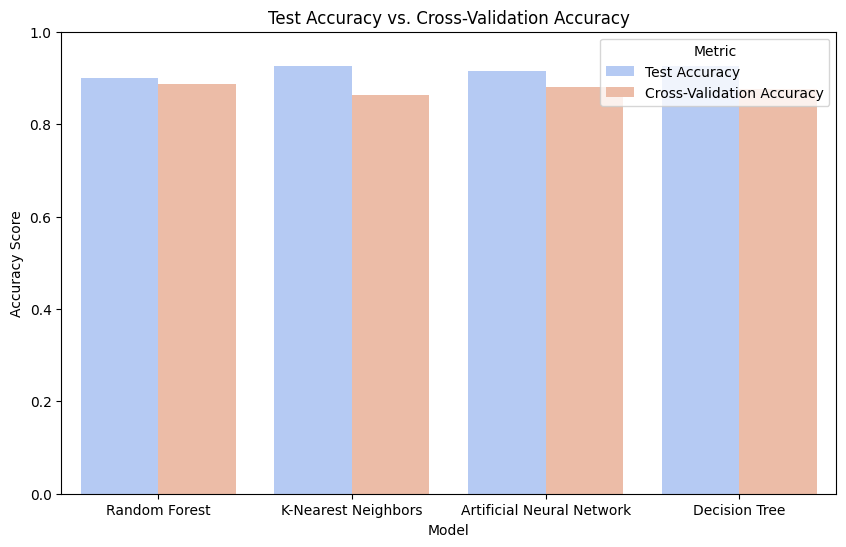

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.barplot(x="Model", y="Accuracy", hue="Metric", data=accuracy_df, palette="coolwarm")

plt.ylim(0, 1)
plt.title("Test Accuracy vs. Cross-Validation Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.legend(title="Metric")
plt.show()

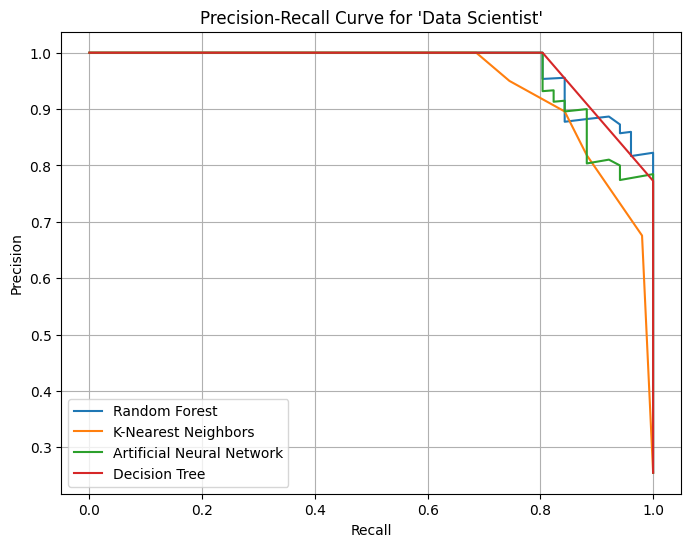

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_test_binary = (y_test == 'Data Scientist').astype(int)

plt.figure(figsize=(8, 6))

for name, model in models.items():
    class_index = list(model.classes_).index('Data Scientist')
    y_pred_proba = model.predict_proba(X_test)[:, class_index]

    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)
    plt.plot(recall, precision, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for 'Data Scientist'")
plt.legend()
plt.grid(True)
plt.show()


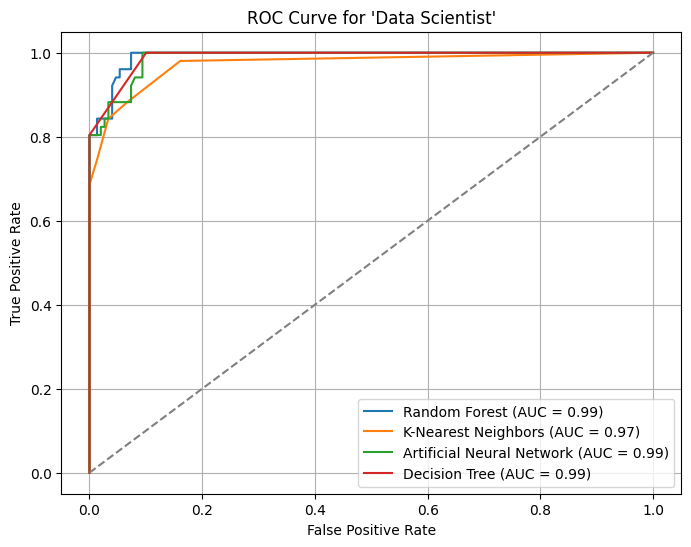

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_binary = (y_test == 'Data Scientist').astype(int)

plt.figure(figsize=(8, 6))

for name, model in models.items():
    class_index = list(model.classes_).index('Data Scientist')

    y_pred_proba = model.predict_proba(X_test)[:, class_index]

    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for 'Data Scientist'")
plt.legend()
plt.grid(True)
plt.show()



/tmp/ipython-input-165-3613933907.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette="coolwarm")


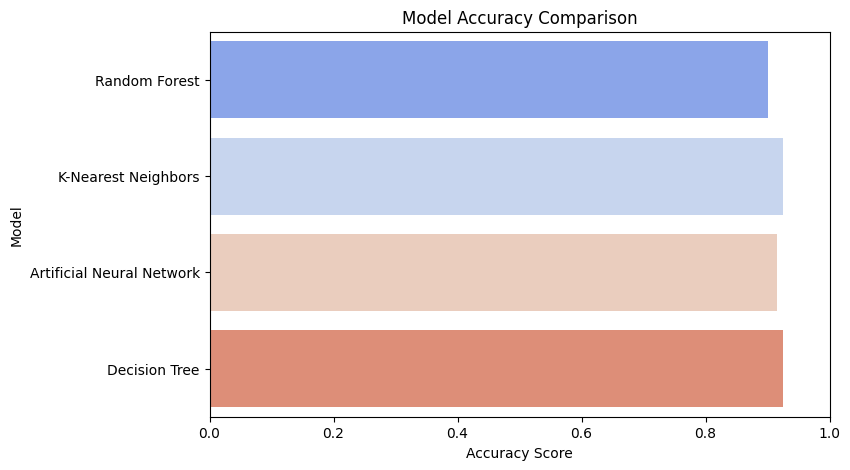

In [ ]:
model_names = list(test_accuracies.keys())
accuracies = list(test_accuracies.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=accuracies, y=model_names, palette="coolwarm")

plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()